# User Engagement Overview

## Load Data

In [19]:
# Libraries we will need for loading and preprocessing the data

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action="ignore")

# to know which filepath to use to get to the source data
import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data\cleaned_data.csv
../data\Field Descriptions.xlsx
../data\first500valuesTellCo.xlsx
../data\TellCo_financial_data.xlsx


In [2]:
# Load data

df_clean = pd.read_csv('../data\cleaned_data.csv', na_values=['?', None])
df_clean

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Social Media Total Data Volume,Youtube Total Data Volume,Netflix Total Data Volume,Google Total Data Volume,Email Total Data Volume,Gaming Total Data Volume,Other Total Data Volume,Throughput Total,RTT Total,TCP Total
0,0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,1.570185e+06,1.835594e+07,1.785519e+07,2.905912e+06,3.701304e+06,2.924265e+08,1.805588e+08,67.0,47.0,NaN
1,1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,1.933278e+06,3.935912e+07,3.556554e+07,4.414096e+06,9.373850e+05,6.099208e+08,5.419594e+08,42.0,70.0,NaN
2,2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,1.726277e+06,3.442524e+07,2.375120e+07,1.022912e+07,3.363124e+06,2.299803e+08,4.149084e+08,15.0,NaN,NaN
3,3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,6.574930e+05,3.653476e+07,1.509259e+07,1.181176e+07,2.070983e+06,8.103879e+08,7.618372e+08,88.0,NaN,NaN
4,4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,9.127880e+05,3.422225e+07,1.753980e+07,7.748843e+06,2.110349e+06,5.312370e+08,5.646198e+08,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,...,3.517065e+06,2.795510e+07,3.756186e+07,1.278491e+07,6.908760e+05,5.358069e+08,1.675193e+07,117.0,32.0,NaN
149997,149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,...,2.352181e+06,2.216552e+07,4.064329e+07,4.415361e+06,2.121718e+06,6.316281e+08,7.146381e+08,77.0,29.0,NaN
149998,149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,...,1.260239e+06,2.451641e+07,1.502970e+07,6.585469e+06,2.058277e+06,5.669338e+08,1.324156e+08,90.0,49.0,NaN
149999,149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,...,8.231090e+05,1.712251e+07,1.649484e+07,7.757267e+06,2.850914e+06,3.550664e+08,8.161200e+08,71.0,42.0,NaN


## Engagement Metrics

We are going to track the user’s(MSISDN/Number) engagement using the following engagement metrics: 
<li>sessions frequency - Bearer Id:count
<li>the duration of the session - Dur. (ms).1
<li>the sessions total traffic (download and upload (bytes)) - Total UL+DL


In [13]:
# user engagement by sessions frequency, duration of the session and session's total traffic

user_data = df_clean[['Bearer Id', 'MSISDN/Number', 'Total UL+DL', 'Dur. (ms).1',]]
user_data

,Bearer Id,MSISDN/Number,Total UL+DL,Dur. (ms).1
0,13114483460844900352,3.366496e+10,345629377.0,1.823653e+09
1,13114483482878900224,3.368185e+10,707185356.0,1.365104e+09
2,13114483484080500736,3.376063e+10,307690973.0,1.361763e+09
3,13114483485442799616,3.375034e+10,889352748.0,1.321510e+09
4,13114483499480700928,3.369980e+10,607681403.0,1.089009e+09
...,...,...,...,...
149996,7277825670196679680,3.365069e+10,631804110.0,8.123076e+07
149997,7349883264234609664,3.366345e+10,705783925.0,9.797070e+07
149998,13114483573367300096,3.362189e+10,627698629.0,9.824953e+07
149999,13114483573367300096,3.361962e+10,401522016.0,9.791063e+07


In [15]:
agg_user_data = user_data.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum', 'Total UL+DL': 'sum'})
agg_user_data.columns = ['sessions_freq', 'sessions_duration(ms)', 'sessions_traffic(bytes)']
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.360100e+10,1,116720140.0,8.786906e+08
3.360100e+10,1,181230963.0,1.568596e+08
3.360100e+10,1,134969374.0,5.959665e+08
3.360101e+10,1,49878024.0,4.223207e+08
3.360101e+10,2,37104453.0,1.457411e+09


Text(0.5, 1.0, 'a barplot indicating 10 users with highest number of sessions')

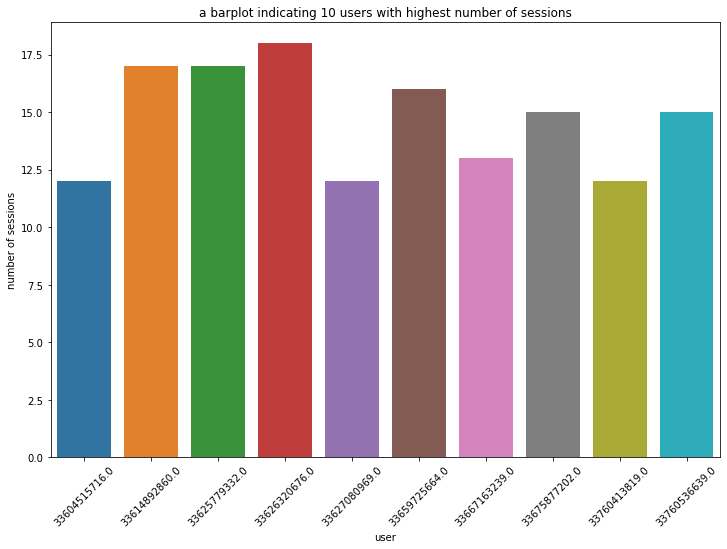

In [16]:
# Top 10 users with high sessions frequency"""

a = agg_user_data.sort_values(by = 'sessions_freq', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = a.index, y = a['sessions_freq'])
plt.ylabel('number of sessions')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest number of sessions')

Text(0.5, 1.0, 'a barplot indicating 10 users with highest sessions traffic')

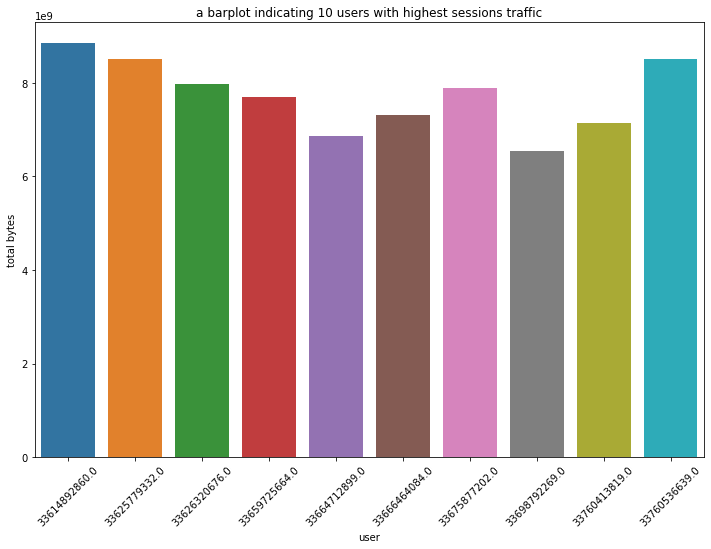

In [10]:
# Top 10 users with high sessions traffic"""

b = agg_user_data.sort_values(by = 'sessions_traffic(bytes)', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = b.index, y = b['sessions_traffic(bytes)'])
plt.ylabel('total bytes')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest sessions traffic')

Text(0.5, 1.0, 'a barplot indicating 10 users with longest sessions duration')

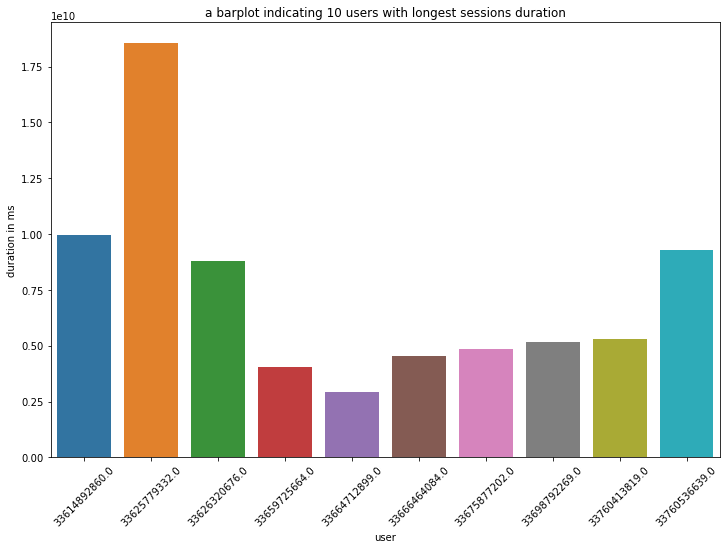

In [11]:
# Top 10 users with longest sessions duration"""

c = agg_user_data.sort_values(by = 'sessions_duration(ms)', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = b.index, y = b['sessions_duration(ms)'])
plt.ylabel('duration in ms')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with longest sessions duration')


In [12]:
# users in the 3 categories.
a = a.index.to_list()
b = b.index.to_list()
c = c.index.to_list()

def IntersecOfSets(arr1, arr2, arr3): 
    s1 = set(arr1) 
    s2 = set(arr2) 
    s3 = set(arr3) 

    set1 = s1.intersection(s2)
    result_set = set1.intersection(s3) 
      
    final_list = list(result_set) 
    print(final_list) 
  
IntersecOfSets(a, b, c)

[33625779332.0, 33626320676.0, 33760413819.0, 33614892860.0, 33760536639.0]


In [23]:
# Normalizing the aggregated dataset using log transformation
norm_agg_user_data = np.log1p(agg_user_data)
norm_agg_user_data.head()

norm_agg_user_data.shape

(106856, 3)

In [20]:
# kmeans on 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(norm_agg_user_data)
kmeans_data = kmeans.predict(norm_agg_user_data)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# add the predicted clusters as a column in the df
norm_agg_user_data['clusters'] = pd.Series(kmeans_data, index=norm_agg_user_data.index)
norm_agg_user_data.head()


In [21]:
# frequency and duration
x = norm_agg_user_data[['sessions_freq', 'sessions_duration(ms)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_duration(ms)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and duration')
plt.xlabel('sessions frequency')
plt.ylabel('sessions duration')
plt.legend()

KeyError: "['clusters'] not in index"

In [ ]:
# comparing the clusters in variable pairs

# frequency and traffic
x = norm_agg_user_data[['sessions_freq', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and traffic')
plt.xlabel('sessions frequency')
plt.ylabel('sessions traffic')
plt.legend()

In [22]:
# comparing the clusters in variable pairs

# duration and traffic
x = norm_agg_user_data[['sessions_duration(ms)', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_duration(ms)'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session duration and traffic')
plt.xlabel('sessions duration')
plt.ylabel('sessions traffic')
plt.legend()

KeyError: "['clusters'] not in index"

## Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text

In [ ]:
# add the clusters column to the non normalized data
agg_user_data['clusters'] = kmeans_data
agg_user_data.head()


In [ ]:
agg_user_data.clusters.value_counts()


In [ ]:
# cluster 1 (cluster = 0)
cluster_1 = agg_user_data.loc[agg_user_data['clusters'] == 0]   #get observations under cluster 1
# cluster_1.loc['total_per_metric'] = cluster_1.sum()             #get the totals per metric
print(cluster_1.shape)
cluster_1.tail()

In [ ]:
cluster_1.describe() # get the min, max and average per metric in cluster 1


In [ ]:
# cluster 2 (cluster = 1)
cluster_2 = agg_user_data.loc[agg_user_data['clusters'] == 1]   #get observations under cluster 2
# cluster_2.loc['total_per_metric'] = cluster_2.sum()             #get the totals per metric
print(cluster_2.shape)
cluster_2.tail()

cluster_2.describe() # get the min, max and average per metric in cluster 2


In [ ]:
# cluster 3 (cluster = 2)
cluster_3 = agg_user_data.loc[agg_user_data['clusters'] == 2]   #get observations under cluster 3
# cluster_3.loc['total_per_metric'] = cluster_3.sum()             #get the totals per metric
print(cluster_3.shape)
cluster_3.tail()

cluster_3.describe() # get the min, max and average per metric in cluster 3


## Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [ ]:
apps_traffic = data[['social_media', 'netflix', 'youtube', 'google', 'email', 'gaming', 'other', 'MSISDN/Number']]
apps_traffic.tail()

agg_apps_traffic = apps_traffic.groupby('MSISDN/Number').agg({'social_media':'sum', 'netflix':'sum', 'youtube':'sum', 'gaming':'sum', 
                                                            'google':'sum', 'email':'sum', 'other':'sum'})
agg_apps_traffic.head()


In [ ]:
# 10 users with highest social media traffic"""

b = agg_apps_traffic.sort_values(by = 'social_media', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = b.index, y = b['social_media'])
plt.ylabel('social_media total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest social_media traffic')

In [ ]:
# 10 users with highest netflix traffic"""

c = agg_apps_traffic.sort_values(by = 'netflix', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = c.index, y = c['netflix'])
plt.ylabel('netflix total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest netflix traffic')


In [ ]:
# 10 users with highest gaming traffic"""

d = agg_apps_traffic.sort_values(by = 'gaming', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = d.index, y = d['gaming'])
plt.ylabel('gaming total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest gaming traffic')


In [ ]:
# 10 users with highest google traffic"""

e = agg_apps_traffic.sort_values(by = 'google', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = e.index, y = e['google'])
plt.ylabel('google total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest google traffic')


In [ ]:
# 10 users with highest email traffic"""

f = agg_apps_traffic.sort_values(by = 'email', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = f.index, y = f['email'])
plt.ylabel('email total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest email traffic')

In [ ]:
# 10 users with highest youtube traffic"""

g = agg_apps_traffic.sort_values(by = 'youtube', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = g.index, y = g['youtube'])
plt.ylabel('youtube total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest youtube traffic')


In [ ]:
# 10 users with highest other traffic"""

h = agg_apps_traffic.sort_values(by = 'other', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = h.index, y = h['other'])
plt.ylabel('other total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest other traffic')

In [ ]:
# users in the 3 categories.
b = b.index.to_list()
c = c.index.to_list()
d = d.index.to_list()
e = e.index.to_list()
f = f.index.to_list()
g = g.index.to_list()
h = h.index.to_list()

In [ ]:
def IntersecOfSets(arr1, arr2, arr3, arr4, arr5, arr6, arr7): 
    s1 = set(arr1) 
    s2 = set(arr2) 
    s3 = set(arr3) 
    s4 = set(arr4)
    s5 = set(arr5)
    s6 = set(arr6)
    s7 = set(arr7)

    set1 = s1.intersection(s2)
    set2 = set1.intersection(s3) 
    set3 = set2.intersection(s4)
    set4 = set3.intersection(s5) 
    set5 = set4.intersection(s6) 
    set6 = set5.intersection(s7) 
      
    final_list = list(set6) 
    print(final_list) 
  
IntersecOfSets(b, c, d, e, f, g, h)


In [ ]:
# * Plot the top 3 most used applications.
Most used applications can be determined by the Application with highest traffic data or the application with the most users.

agg_apps_traffic.loc['total_app_traffic'] = agg_apps_traffic.sum()  
agg_apps_traffic.tail()

a = agg_apps_traffic.tail(1)
long_df = pd.melt(a)
long_df = long_df.sort_values(by = 'value', ascending = False).head(3)
plt.figure(figsize=(10,4))
sns.barplot(x = long_df.variable, y = long_df.value)
plt.title('top 3 most used apps based on total traffic')
plt.ylabel('total bytes')
plt.xlabel('application')


In [ ]:
"""**k=4**"""

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
kmeans.fit(norm_agg_user_data)
y_means = kmeans.predict(norm_agg_user_data)
agg_user_data['clusters'] = y_means
# agg_user_data = agg_user_data.drop(['clusetrs'], axis = 1)
agg_user_data.head()

In [ ]:
#clusters df
cluster_1 = agg_user_data[agg_user_data.clusters == 0]
cluster_2 = agg_user_data[agg_user_data.clusters == 1]
cluster_3 = agg_user_data[agg_user_data.clusters == 2]
cluster_4 = agg_user_data[agg_user_data.clusters == 3]


In [ ]:
# descriptions
cluster_1.describe()

cluster_2.describe()

cluster_3.describe()

cluster_4.describe()